# Executive Summary

The overall conversion rate was 11% where email was the most successful in subscring users and the most cost-effective while direct mail was the least successful and the least cost-effective. On average, users subscribed on the same day they saw the ad. Starting from age 19, conversion rates tend to decrease as users are in older age groups. 

To improve conversion rates while keeping cost-per-acquisition low, the efforts on direct mailing should be diverted towards email, Facebook and Instagram (depending on target client) marketing instead.

The overall retention rate was 68% and users canceled their subscription after 48 days on average. Ages 19 to 24 had the highest retention rate while ages 45 to 55 had the lowest. Furthermore, there seems to be no apparent relationship between age and retention rate.

To improve retention, email newsletters could be sent during the first 48 days to encourage users' engagement with the product. Understanding what happens in that 48-day period (e.g. by analyzing user behavior data) can help improve product experience for new users and improve retention rate.

# 1. Import data

In [2]:
import pandas as pd
import numpy as np

In [3]:
dat = pd.read_csv('marketing1.csv')
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB


In [3]:
dat.tail()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
10032,a100007290,1/17/18,Email,control,True,German,German,45-55 years,1/17/18,1/24/18,Email,False
10033,a100007291,1/17/18,Email,control,True,German,German,55+ years,1/17/18,NaN,Email,True
10034,a100007292,1/5/18,Instagram,control,False,German,German,55+ years,1/17/18,NaN,Email,True
10035,a100007293,1/17/18,Email,control,True,German,German,0-18 years,1/17/18,NaN,Email,True
10036,a100007294,1/6/18,Facebook,control,False,German,German,0-18 years,1/17/18,NaN,Email,True


# 2. Convert data format

Are 'marketing_channel', 'variant', 'language_displayed', 'language_preferred', 'age_group', and 'subscribing_channel' categorical values? Yes, and all the values seem to be consistent (no duplicate values with different spelling, etc).

In [4]:
for i in ['marketing_channel', 'variant', 'language_displayed', 'language_preferred', 'age_group', 'subscribing_channel']:
    print(dat.loc[:,i].unique())

['House Ads' 'Push' 'Facebook' 'Instagram' 'Email' nan]
['personalization' 'control']
['English' 'German' 'Arabic' 'Spanish']
['English' 'German' 'Arabic' 'Spanish']
['0-18 years' '19-24 years' '24-30 years' '30-36 years' '36-45 years'
 '45-55 years' '55+ years']
['House Ads' 'Email' 'Push' 'Facebook' 'Instagram' nan]


Since they are indeed categorical values, the data format should be changed as categories.

In [5]:
for i in ['marketing_channel', 'variant', 'language_displayed', 'language_preferred', 'age_group', 'subscribing_channel']:
    dat[i] = dat[i].astype("category")

What about other columns? The first few rows of the dataset shows that 'converted' and 'is_retained' should be either True or False values and that 'date_served','date_subscribed',and 'date_canceled' are date values. 

In [6]:
for i in ['converted','is_retained']:
    dat[i] = dat[i].astype('bool') # converting 'converted', and 'is_retained' to boolean values
for i in ['date_served','date_subscribed','date_canceled']:
    dat[i] = pd.to_datetime(dat[i], format='%m/%d/%y') # converting the date variables to Datetime objects

Checking if the data are now in the right format! It looks good! Note: user_id is already in the str (string) format.

In [103]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  category      
 3   variant              10037 non-null  category      
 4   converted            10037 non-null  bool          
 5   language_displayed   10037 non-null  category      
 6   language_preferred   10037 non-null  category      
 7   age_group            10037 non-null  category      
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   category      
 11  is_retained          10037 non-null  bool          
dtypes: bool(2), category(6), datetime64[ns](3), object(1)
memory usage: 393.5+ KB


# 3. Explore the data!

1. Before calculating the conversion rate, conducting exploratory data analysis should help understand the data better.
First, if 'date_canceled' is non-empty, 'is_retained' always False (is 'date_canceled' and 'is_retained'=True mutually exclusive)? Yes, if 'is_retained' is True, then 'date_canceled' = 'NaT' only and no other values.

In [10]:
dat.loc[dat.is_retained == True].date_canceled.unique()

array(['NaT'], dtype='datetime64[ns]')

2. Throughout the campaign, how did the ad view fluctuate? The view seems to fluctuate around 300 views/day. There was a peak on January 15th - about 750 people saw the ad. During the last week of January (21st-26th) the ad had the lowest number of views. 

<AxesSubplot:xlabel='date_served'>

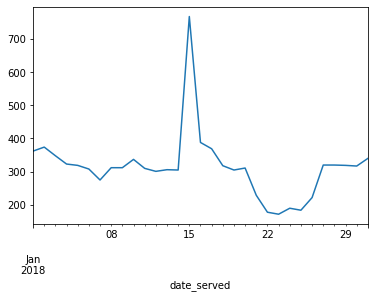

In [7]:
ad_views = dat.groupby(['date_served'])['user_id'].nunique()
ad_views.plot()

How many unique people are in this dataset and can a user have multiple data?

In [19]:
print("There are "+ str(len(dat)) + " instances/observations in this dataset and " + str(dat['user_id'].nunique()) + " unique users")

There are 10037 instances/observations in this dataset and 7309 unique users


3. To investigate further on "duplicate users", the dataset is filtered and saved as another dataset. Looking at the first few lines of the saved dataset, it can be observed that a user can have multiple unique 'date_served' values, meaning a user saw the ad multiple times on different days. 

In [8]:
duplicate_user = dat[dat.duplicated(subset=['user_id'], keep=False)]
duplicate_user.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
21,a100000050,2018-01-02,House Ads,personalization,True,English,English,24-30 years,2018-01-02,NaT,House Ads,True
22,a100000050,2018-01-01,House Ads,personalization,False,English,English,24-30 years,2018-01-02,NaT,House Ads,True
23,a100000051,2018-01-02,House Ads,personalization,True,English,English,30-36 years,2018-01-02,NaT,House Ads,True
24,a100000051,2018-01-01,Push,personalization,False,English,English,30-36 years,2018-01-02,NaT,House Ads,True
25,a100000052,2018-01-02,House Ads,personalization,True,English,English,36-45 years,2018-01-02,NaT,House Ads,True


4. Is it possible that a user saw the ad multiple times within the same day? Yes, plotting the total times the ad is viewed vs. the number of unique dates viewed for each user, it can be observed that there are instances where a few users saw the ad within the same day (where the blue line is not covered by the orange line) - so no need to worry if the data records only the **first** or the **last** time if a user views the ad multiple times within the same day.

<AxesSubplot:xlabel='user_id'>

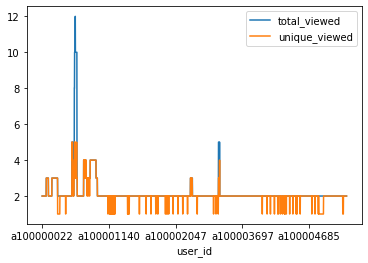

In [9]:
duplicate_user_dates = duplicate_user[duplicate_user.date_served.notnull()] #only non-empty dates should be considered

total_viewed = duplicate_user_dates.groupby(['user_id']).date_served.count().to_frame() #number of total instances a user views the ad
unique_viewed = duplicate_user_dates.groupby(['user_id']).date_served.nunique().to_frame() #number of unique dates a user views the ad

df = pd.concat([total_viewed,unique_viewed], axis=1, ignore_index=True)
df.columns = ['total_viewed','unique_viewed']

df.plot()

5. Let's see how many times the ad was shown to most users. From this histogram, it can be observed that most of the users saw the ad twice. There are a few users who saw the ad eleven times!

<AxesSubplot:>

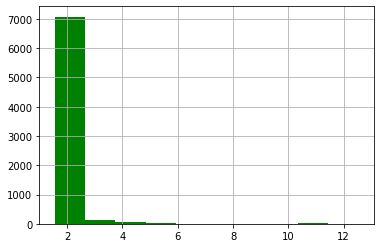

In [10]:
df = dat[dat.date_served.notnull()] #only non-empty dates should be considered
df.groupby(['user_id']).date_served.count().hist(align='right', color='green')

6. How is each data different for users who saw the ad multiple times on the same day? It can be observed that the ad was shown to users multiple times a day with different marketing channels and different results (converted=True/False).

In [11]:
nunique_date_per_user = duplicate_user_dates.groupby(['user_id']).date_served.nunique() #number of unique dates viewed for each user

indx = [] #list will contain some of the users who saw the ad muliple times on the same day
for index, row in dat.iterrows():
    if dat.loc[index,'user_id'] in nunique_date_per_user[nunique_date_per_user==1].index:
        indx.append(index)

dat.loc[indx]

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
445,a100000617,2018-01-30,Facebook,control,True,English,English,55+ years,2018-01-30,NaT,Facebook,True
446,a100000617,2018-01-30,Facebook,control,False,English,English,55+ years,2018-01-30,NaT,Facebook,True
447,a100000618,2018-01-31,Facebook,control,True,English,English,0-18 years,2018-01-31,NaT,Facebook,True
448,a100000618,2018-01-31,Facebook,control,False,English,English,0-18 years,2018-01-31,NaT,Facebook,True
449,a100000619,2018-01-21,Facebook,control,True,English,English,19-24 years,2018-01-21,NaT,Facebook,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8514,a100005694,2018-01-31,Push,personalization,False,English,English,19-24 years,NaT,NaT,NaN,True
8515,a100005695,2018-01-31,House Ads,personalization,False,English,English,24-30 years,NaT,NaT,NaN,True
8516,a100005695,2018-01-31,Facebook,personalization,False,English,English,24-30 years,NaT,NaT,NaN,True
8517,a100005696,2018-01-31,House Ads,personalization,False,English,English,30-36 years,NaT,NaT,NaN,True


7. Lastly, for each user, are 'language_displayed' and 'language_preferred' consistent? Yes, except a few users who set two displayed/preferred languages.

array([[<AxesSubplot:title={'center':'lang_disp_per_user'}>,
        <AxesSubplot:title={'center':'lang_pref_per_user'}>]],
      dtype=object)

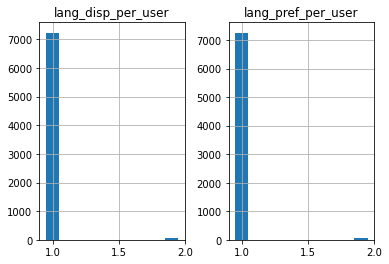

In [12]:
lang_disp_per_user = dat.groupby(['user_id']).language_displayed.nunique().to_frame()
lang_pref_per_user = dat.groupby(['user_id']).language_preferred.nunique().to_frame()

df = pd.concat([lang_disp_per_user, lang_pref_per_user], axis=1, ignore_index=True)
df.columns = ['lang_disp_per_user', 'lang_pref_per_user']

df.hist(align='left')

8. How are data different for users who set more than one language? Looking at the data, it can be observed that for some of these users, the 'marketing_channel','converted', and 'age_group' are different. This shows that for some of these users, their data can be merged together to result in better data quality. It's hard to tell whether each of the instance was created because the user saw the ad multiple times on the same day or because the user made changes  to age and languages. One **solution** could be that the data captures only the most recent information on age, preferred and displayed languages, even if users make multiple changes after subscription.

In [13]:
language = dat.groupby(['user_id']).language_preferred.nunique()
user_mult_language = language[language>1].index

indx = []
for index, row in dat.iterrows():
    if dat.loc[index, 'user_id'] in user_mult_language:
        indx.append(index)
        
dat.loc[indx, :]

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
561,a100000727,2018-01-17,Email,control,True,Arabic,Arabic,0-18 years,2018-01-17,NaT,Email,True
562,a100000727,2018-01-05,House Ads,control,False,English,English,0-18 years,2018-01-17,NaT,Email,True
585,a100000739,2018-01-16,Email,control,True,Arabic,Arabic,45-55 years,2018-01-16,2018-03-27,Email,False
586,a100000739,2018-01-05,House Ads,control,False,English,English,45-55 years,2018-01-16,2018-03-27,Email,False
619,a100000776,2018-01-17,Email,personalization,False,Arabic,Arabic,55+ years,2018-01-17,NaT,Email,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2513,a100000913,2018-01-03,House Ads,control,False,Spanish,Spanish,45-55 years,NaT,NaT,NaN,True
2518,a100000916,2018-01-28,House Ads,control,False,English,Spanish,19-24 years,NaT,NaT,NaN,True
2519,a100000916,2018-01-03,Instagram,control,False,English,English,24-30 years,NaT,NaT,NaN,True
2532,a100000944,2018-01-30,Instagram,control,False,English,English,0-18 years,NaT,NaT,NaN,True


# 4. Calculate conversion rates

What is the overall conversion rate? 

In [14]:
overall_cr = sum(dat.converted==True)/len(dat)
print("The overall conversion rate is "+ str(round(overall_cr*100, 2)) + "%")

The overall conversion rate is 10.87%


How are the conversion rates different for each marketing channel? Email has the highest conversion rate (34.2%) while House Ads has the lowest conversion rate (6.3%). Instagram (14.2%) and Facebook (12.7%) have similar conversion rates.

In [15]:
df = dat[dat.marketing_channel.notnull()] #only non-null values should be considered

channel_cr = df.groupby(['marketing_channel']).converted.sum() / df.groupby(['marketing_channel']).marketing_channel.count() *100
channel_cr.sort_values(ascending=False)

marketing_channel
Email        34.159292
Instagram    14.163549
Facebook     12.741935
Push          8.358510
House Ads     6.296218
dtype: float64

How are the conversion rates different between age groups? Ages 18-24 have the highest conversion rate (18.9%) while ages 36-45 have the lowest (5.9%). It seems that older the age group is, lower the conversation rate is in general (see graph below).

In [16]:
df = dat[dat.age_group.notnull()] #only non-null values should be considered

age_cr = df.groupby(['age_group']).converted.sum() / df.groupby(['age_group']).date_served.count() *100
age_cr.sort_values(ascending=False)

age_group
19-24 years    18.891538
24-30 years    15.325670
0-18 years     13.207547
55+ years       7.172996
30-36 years     6.208426
45-55 years     6.069578
36-45 years     5.921540
dtype: float64

<AxesSubplot:xlabel='age_group'>

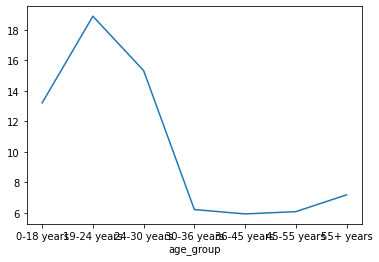

In [17]:
age_cr.plot()

For those who subscribed, how long apart were the subscription date and the date the ad was viewed on average? On average, users subscribed on the same day the ad was shown to them!

In [18]:
days_avg = dat[dat.converted].date_subscribed.mean() - dat[dat.converted].date_served.mean()

days_avg.round(freq = 'D') 

Timedelta('0 days 00:00:00')

What is the most cost-effective marketing channel? It is assumed that each data instance describes each time a new email, Facebook post, Instagram post or direct mail reaches a potentional client redundantly or for the first time. The table below shoes the number of times each marketing channel was viewed/received. Note that the cost of push marketing could not be estimated since its strategies can vary diversely by company (no detail was given). 

During the campaign, there was 565 views of the email. The cost of email marketing varies by service platform, number of subscribers, and number of target viewers. On service platform like MailChimp, sending emails to 500 contacts can cost as little as 0 dollars for very basic options and as much as 300 dollars/month for more sophisticated customization. If graphic design and writing are outsourced, there would be additional 80 dollars/hr and 150 dollars/hr cost (averages), according to https://www.thumbtack.com/p/email-marketing-price. 

For Facebook posts, there was a total of 1860 views. If the campaign chose cost-per-thousand-impressions method (CPM), it may have costed approximately 14.38 dollars (7.19/1000 views). However, if it was cost-per-click method (CPC), it may have costed about 1,804.2 dollars (0.97/click). (https://www.webfx.com/social-media/how-much-does-facebook-advertising-cost.html)

Instagram posts made 1871 impressions. CPM method would have costed about 13.4 dollars (6.70/1000 impressions) and CPC would have costed about 3,742 dollars (2/click). (https://www.webfx.com/social-media/how-much-does-it-cost-to-advertise-on-instagram.html) Note that the rates of CPM and CPC used here are only averages and they can vary widely by how competitve the market is on Instagram. 

Lastly, about 4733 direct mails (House Ads) were sent. According to USPS Delivers (https://www.uspsdelivers.com/direct-mail-cost-calculator/), direct mail campaign of 5000 mailings can cost as little as 6,400 dollars for basic design and simple mailing method, and can cost as much as 10,496.89 dollars which includes outsourcing fees for design and purchase of list of targeted potential customers to be mailed to.

See the table below for summary of the potential costs of each marketing channel.

In [42]:
# Number of times each marketing channel was viewed/received
dat.groupby(['marketing_channel']).user_id.count()[:4]

marketing_channel
Email         565
Facebook     1860
House Ads    4733
Instagram    1871
Name: user_id, dtype: int64

In [50]:
# Potential cost ($) per campaign of each marketing channel 
potential_costs = pd.DataFrame({"Email":[0, 530], "Facebook": [14.38, 1804.2], 
                               "Instagram":[13.4, 3742], "House Ads":[6400, 10496.89]})
potential_costs.index = ["min cost","max cost"]

print(potential_costs)

          Email  Facebook  Instagram  House Ads
min cost      0     14.38       13.4    6400.00
max cost    530   1804.20     3742.0   10496.89


So which marketing channel was the most cost-effective? For both minimum and maximum estimations, email had the lowest cost-per-acquisition while direct mail (House Ads) had the highest cost-per-acquisition.

In [56]:
# Minimum and maximum cost-per-acquisition ($) of each marketing channel
round(potential_costs / np.array(dat.groupby(['marketing_channel']).converted.sum()[:4].sort_values()),2)

,Email,Facebook,Instagram,House Ads
min cost,0.00,0.06,0.05,21.48
max cost,2.75,7.61,14.12,35.22


# 5. Calculate retention rates

Since retention rate should consider the case of unique users, the dataset should contain only unique subscribers. Note that each instance/observation in the data represents each time a user views the ad (each instance does not represent each unique user), so it is possible that the same user contributes to multiple 'is_retained'=True in the data. This should be avoided.

In [167]:
unique_subscribers = dat[dat.converted==True].groupby(['user_id'])
unique_remained = unique_subscribers.is_retained.sum()>0

print("The overall retention rate is "
      + str(round(sum(unique_remained) / len(unique_subscribers) * 100, 2)) + "%")
# note: because the data was grouped by 'user_id', and then was filtered by unique_subscribers.is_retained.sum()>0,
# only unique users who remained subscribed, regardless how many times, are considered.

The overall retention rate is 67.57%


How are the retention rates different for each age group? From the exploratory data analysis, it was learned that few users had changed their age group, resulting in users with several different 'age_group' values. These users should not be considered in this analysis. 

Ages 19-24 have the highest retention rate (69.9%) while ages 45-55 have the lowest (62.2%). It is interesting that there is no apparent relationship between age and retention rate (see the plot below).

In [178]:
temp = unique_remained[unique_subscribers.age_group.count()==1]
converted = dat[dat.converted==True]

indx = []
for index, row in converted.iterrows():
    if converted.loc[index,'user_id'] in temp.index:
        indx.append(index)
        
df = converted.loc[indx] #dataset containing unique users who remained subscribed and consistenly indicated their age group

age_rr = df.groupby(['age_group']).is_retained.sum() / df.groupby(['age_group']).age_group.count() * 100
age_rr.sort_values(ascending = False)

age_group
19-24 years    69.899666
30-36 years    68.421053
24-30 years    66.517857
0-18 years     65.775401
55+ years      65.753425
36-45 years    62.162162
45-55 years    62.162162
dtype: float64

<AxesSubplot:xlabel='age_group'>

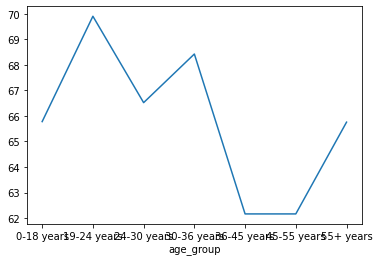

In [179]:
age_rr.plot()

The retention rate for users whose language displayed does not match with their language preferred is 51.9%, about 16% lower than the overall retention rate (67.6%), as expected.

In [194]:
df = converted[converted.language_displayed.notnull()]

language_match_df = df[df.language_displayed!=df.language_preferred]
print(str(round(sum(language_match_df.is_retained)/len(language_match_df) * 100, 2)) + "%")

51.85%


For those who canceled their subscription, how long apart were the subscription date and the cancelation date on average? Approximately 48 days.

In [227]:
days_avg = converted[converted.is_retained == False].date_canceled.mean() -  converted[converted.is_retained == False].date_subscribed.mean()
days_avg.round(freq = 'D')

Timedelta('48 days 00:00:00')

# 6. Conclusion

The conversion rate of the marketing campaign was 11% where email as marketing channel was the most successful in subscring users and the most cost-effective while house ads was the least successful and the least cost-effective. On average, users subscribed on the same day they saw the ad. Starting from age 19, conversion rates tend to decrease as users are in older age groups. To improve conversion rates while keeping cost-per-acquisition low, the efforts on direct mailing should be diverted towards email, Facebook and Instagram (depending on target client) marketing instead.

The retention rate was 68% and users canceled their subscription after 48 days on average. Ages 19 to 24 had the highest retention rate while ages 45 to 55 had the lowest. Furthermore, there seems to be no apparent relationship between age and retention rate. Users whose displayed languaged matched with their preferred language tend to remained subscribed.To improve retention, email newsletters could be sent during the first 48 days to encourage users' engagement with the product.

As a next step, user data analysis can be conducted on recent subscribers to understand their behaviour in the first 48 days and find opportunities to improve their engagment.